# Kép betöltése és megjelenítése

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
from scipy.signal import convolve2d #2D konvolúció

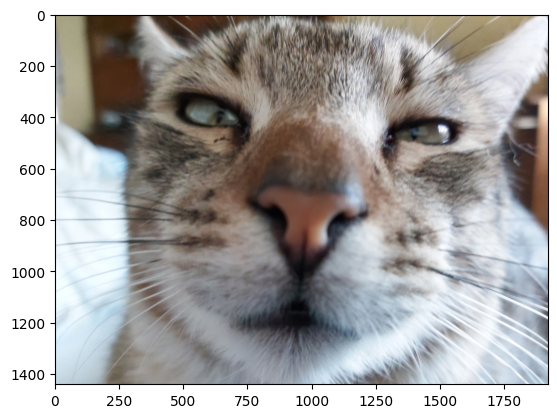

In [17]:
img = mpimg.imread('Images/cat.jpg')
imgplot = plt.imshow(img)
plt.show()

# Kép vágása

In [18]:
#image shape (height, width, depth/color)
print(img.shape)

(1440, 1920, 3)


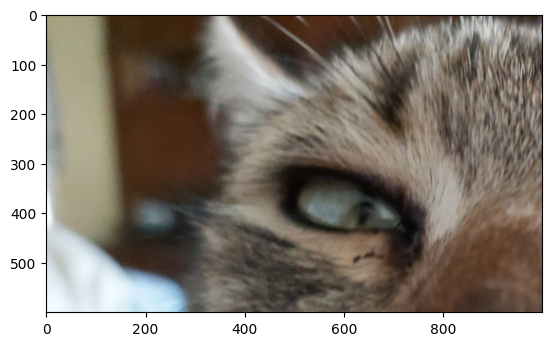

In [19]:
img_cropped = img[0:600, 0:1000, :]
imgplot = plt.imshow(img_cropped)
plt.show()

In [20]:
print(img_cropped.shape)

(600, 1000, 3)


# Kép szürkeárnyalatossá tétele
## Átlagolással

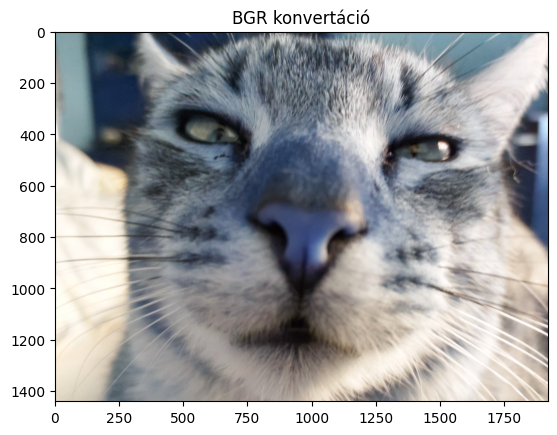

In [21]:
grey_img = cv2.imread('Images/cat.jpg')

#Transform so Matplotlib can read it correctly
fix_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.title('BGR konvertáció')
plt.imshow(fix_img)

#Matplotlib expects Red Green Blue
#OPENCV reads as Blue Green Red

#the three channels
R, G, B = fix_img[:,:,0], fix_img[:,:,1],fix_img[:,:,2]

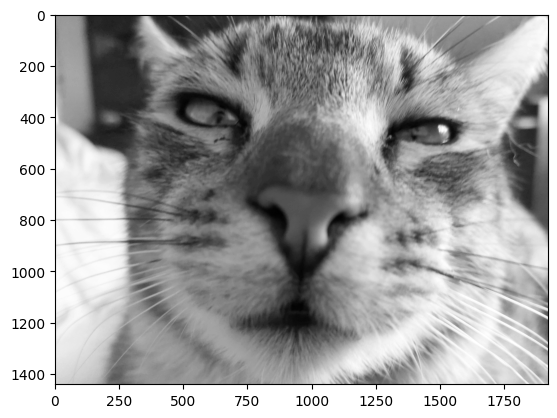

In [22]:
gray_avg_img = np.mean(fix_img, axis=2)
plt.imshow(gray_avg_img, cmap='gray')

## Súlyozott átlaggal 

In [23]:
#OpenCV grayscale conversion formula
Y = 0.299 * R + 0.587 * G + 0.114 * B
print(Y)

[[152.002 151.002 151.002 ... 161.791 161.78  161.78 ]
 [151.002 151.002 150.002 ... 164.15  162.78  161.78 ]
 [150.002 151.002 151.002 ... 168.15  163.78  159.78 ]
 ...
 [217.009 216.009 216.009 ... 193.77  194.46  194.101]
 [215.009 215.009 216.009 ... 194.77  195.813 197.101]
 [214.009 215.009 216.009 ... 195.77  194.813 195.101]]


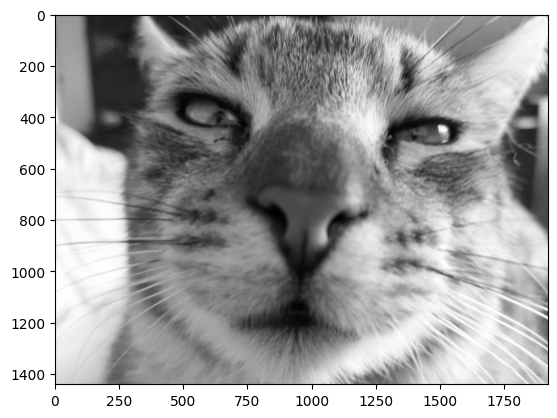

In [24]:
plt.imshow(Y, cmap='gray')

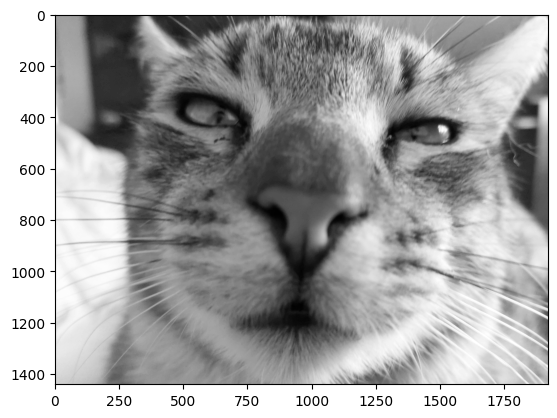

In [25]:
#OpenCV function
gray_img_ocv = cv2.imread('Images/cat.jpg', cv2.IMREAD_GRAYSCALE)
#print(gray_img_ocv)

plt.imshow(gray_img_ocv, cmap='gray')

# Hisztogram
## OpenCV

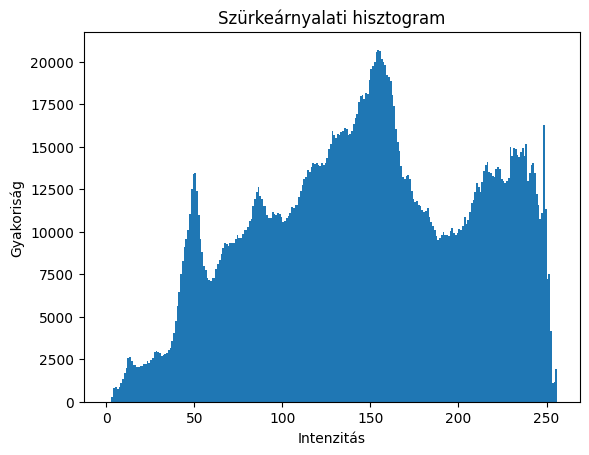

In [35]:
histg = cv2.calcHist([gray_img_ocv], [0], None, [256], [0, 256])
#cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])

plt.xlabel('Intenzitás')
plt.ylabel('Gyakoriság')
plt.title('Szürkeárnyalati hisztogram')
plt.hist(gray_img_ocv.ravel(), 256, [0,256])
plt.show()

## Matplotlib

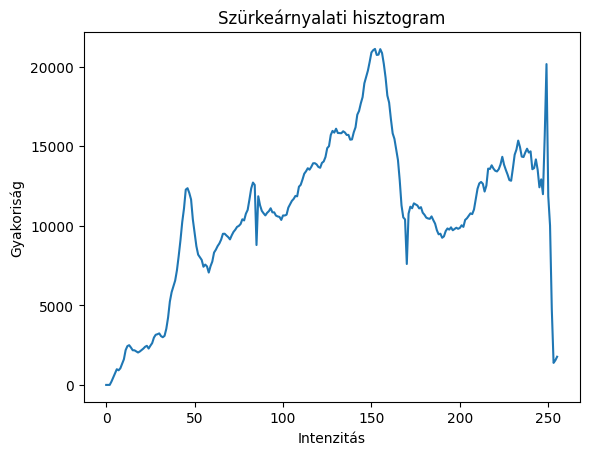

In [37]:
hist,bin = np.histogram(gray_avg_img.ravel(), 256, [0,255])

plt.plot(hist)
plt.xlabel('Intenzitás')
plt.ylabel('Gyakoriság')
plt.title('Szürkeárnyalati hisztogram')
plt.show()


# Küszöbölés

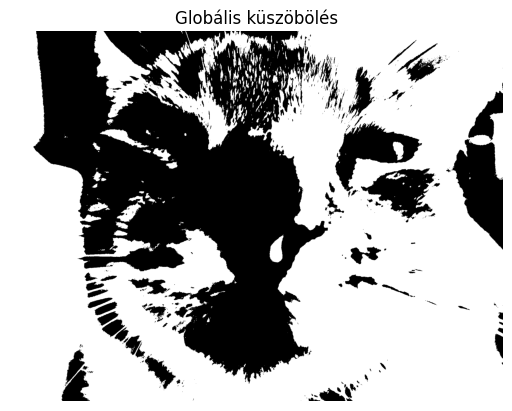

In [29]:
_, thresholded_image = cv2.threshold(gray_avg_img, 127, 255, cv2.THRESH_BINARY)

plt.figure()
plt.imshow(thresholded_image, cmap='gray')
plt.axis('off')
plt.title('Globális küszöbölés')
plt.show()


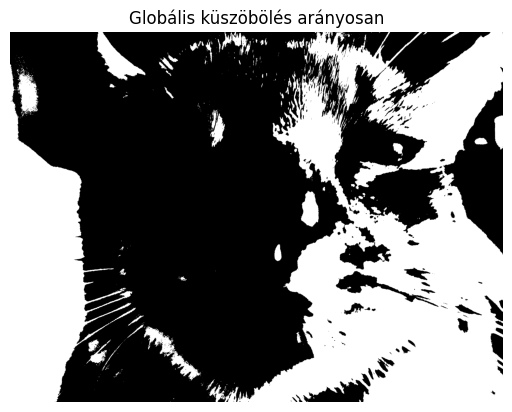

In [47]:
def global_threshold_ratio(image, ratio):
    # Kép konvertálása szürkeárnyalatossá
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Küszöbérték meghatározása az adott arány alapján
    threshold_value = np.percentile(gray_image, ratio * 100)
    
    # Küszöbölés
    _, thresholded_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)
    
    return thresholded_image

thresh_img = global_threshold_ratio(img, .6)


plt.figure()
plt.imshow(thresh_img, cmap='gray')
plt.axis('off')
plt.title('Globális küszöbölés arányosan')
plt.show()


# Átlagoló szűrő 
## OpenCV

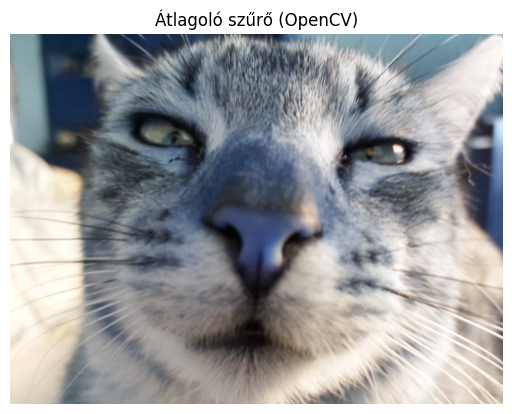

In [30]:
kernel_size = (3, 3)  # A szűrő mérete (pl. 3x3)
filtered_image = cv2.blur(img, kernel_size)

plt.figure()
plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Átlagoló szűrő (OpenCV)')
plt.show()

## Kézi implementáció

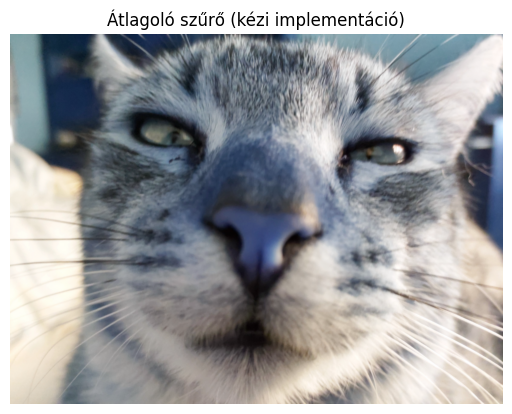

In [31]:
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Kép átalakítása RGB formátumba

kernel_size = (3, 3)  # A szűrő mérete (pl. 3x3)
kernel = np.ones(kernel_size) / np.prod(kernel_size)

filtered_image_r = convolve2d(image_rgb[:,:,0], kernel, mode='same', boundary='symm')
filtered_image_g = convolve2d(image_rgb[:,:,1], kernel, mode='same', boundary='symm')
filtered_image_b = convolve2d(image_rgb[:,:,2], kernel, mode='same', boundary='symm')

filtered_image = np.stack((filtered_image_r, filtered_image_g, filtered_image_b), axis=2).astype(np.uint8)

plt.figure()
plt.imshow(filtered_image)
plt.axis('off')
plt.title('Átlagoló szűrő (kézi implementáció)')
plt.show()

## Különböző kernel méretekkel

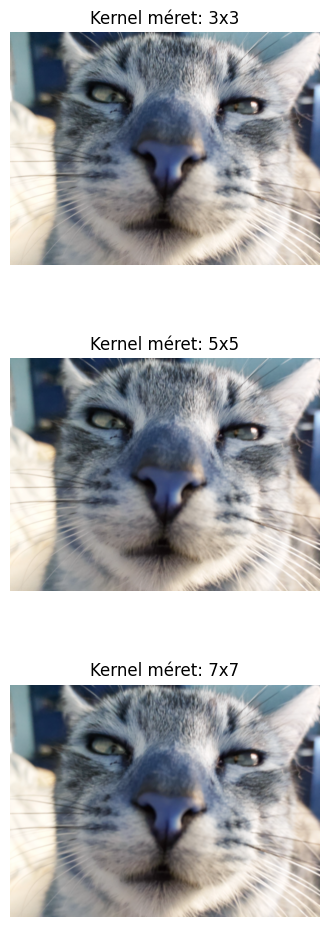

In [55]:
def average_filter(image, kernel_size):
    # Átlagoló szűrő alkalmazása
    filtered_image = cv2.blur(image, (kernel_size, kernel_size))
    
    return filtered_image

# Kernel méretek
kernel_sizes = [3, 5, 7]  # Például 3x3, 5x5, 7x7 kernel méretek

# Átlagoló szűrő alkalmazása különböző kernel méretekkel
filtered_images = []
for kernel_size in kernel_sizes:
    filtered_image = average_filter(img, kernel_size)
    filtered_images.append(filtered_image)

# Eredmények megjelenítése
fig, axs = plt.subplots(len(filtered_images), 1, figsize=(4, 12))

for i, filtered_image in enumerate(filtered_images):
    axs[i].imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
    axs[i].set_title(f'Kernel méret: {kernel_sizes[i]}x{kernel_sizes[i]}')
    axs[i].axis('off')

plt.show()

## Nem négyzetes kernel

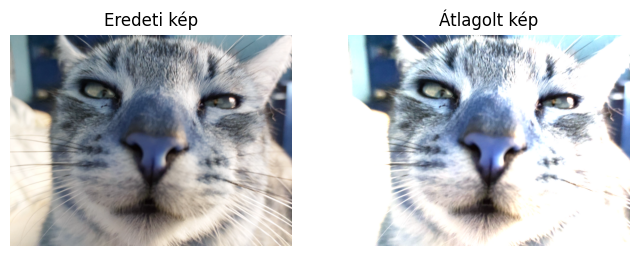

In [61]:
def average_filter(image, kernel):
    # Átlagoló szűrő alkalmazása
    filtered_image = cv2.filter2D(image, -1, kernel)
    
    return filtered_image

# Kernel definiálása
kernel = np.array([[0.1, 0.2, 0.1],
                   [0.2, 0.4, 0.2],
                   [0.1, 0.2, 0.1]])

# Átlagoló szűrő alkalmazása nem négyzetes kernellel
filtered_image = average_filter(img, kernel)

# Eredmény megjelenítése
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Eredeti kép')
axs[0].axis('off')

axs[1].imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
axs[1].set_title('Átlagolt kép')
axs[1].axis('off')

plt.show()

# Élkiemelés
## Roberts filter

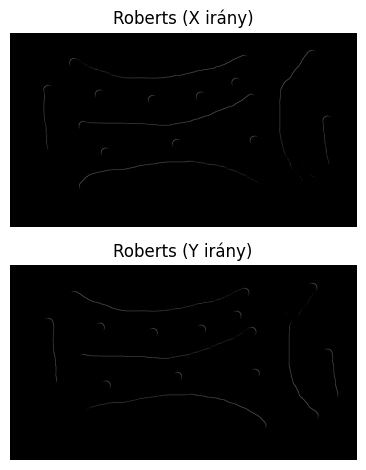

In [32]:
lines = cv2.imread('Images/lines.png', cv2.IMREAD_GRAYSCALE)


roberts_x = np.array([[1, 0], [0, -1]])
roberts_y = np.array([[0, 1], [-1, 0]])

filtered_image_x = cv2.filter2D(lines, -1, roberts_x)
filtered_image_y = cv2.filter2D(lines, -1, roberts_y)

plt.subplot(2,1,1)
plt.imshow(filtered_image_x, cmap='gray')
plt.axis('off')
plt.title('Roberts (X irány)')

plt.subplot(2,1,2)
plt.imshow(filtered_image_y, cmap='gray')
plt.axis('off')
plt.title('Roberts (Y irány)')

plt.tight_layout()
plt.show()

## Sobel filter

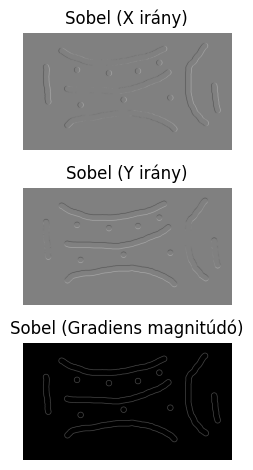

In [33]:
filtered_image_sobel_x = cv2.Sobel(lines, cv2.CV_64F, 1, 0, ksize=3)
filtered_image_sobel_y = cv2.Sobel(lines, cv2.CV_64F, 0, 1, ksize=3)


plt.subplot(3,1,1)
plt.imshow(filtered_image_sobel_x, cmap='gray')
plt.axis('off')
plt.title('Sobel (X irány)')

plt.subplot(3,1,2)
plt.imshow(filtered_image_sobel_y, cmap='gray')
plt.axis('off')
plt.title('Sobel (Y irány)')

plt.subplot(3,1,3)
gradient_magnitude = np.sqrt(filtered_image_sobel_x**2 + filtered_image_sobel_y**2)
plt.imshow(gradient_magnitude, cmap='gray')
plt.axis('off')
plt.title('Sobel (Gradiens magnitúdó)')

plt.tight_layout()
plt.show()

# Élkiemelés konvolúciós mátrixszokkal

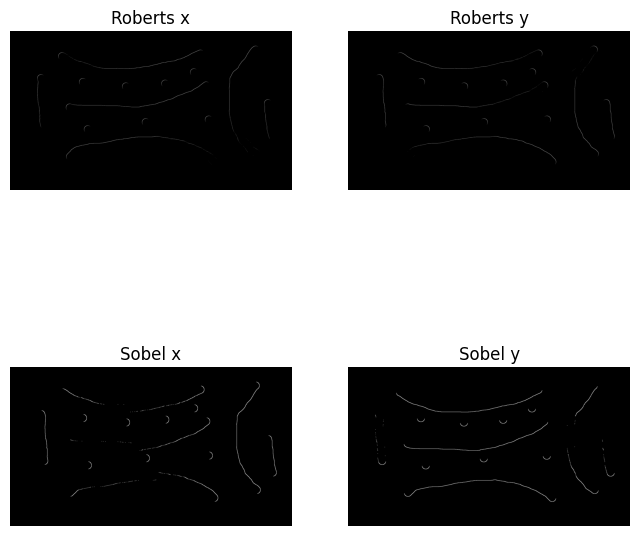

In [64]:
def edge_detection(image, kernel):
    # Élkimelés konvolúcióval
    filtered_image = cv2.filter2D(image, -1, kernel)
    
    return filtered_image


# Roberts operátorok
roberts_x = np.array([[1, 0],
                      [0, -1]])

roberts_y = np.array([[0, 1],
                      [-1, 0]])

# Sobel operátorok
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

# Élkimelés Roberts operátorokkal
roberts_x_filtered = edge_detection(lines, roberts_x)
roberts_y_filtered = edge_detection(lines, roberts_y)

# Élkimelés Sobel operátorokkal
sobel_x_filtered = edge_detection(lines, sobel_x)
sobel_y_filtered = edge_detection(lines, sobel_y)

# Eredmények megjelenítése
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

axs[0, 0].imshow(roberts_x_filtered, cmap='gray')
axs[0, 0].set_title('Roberts x')
axs[0, 0].axis('off')

axs[0, 1].imshow(roberts_y_filtered, cmap='gray')
axs[0, 1].set_title('Roberts y')
axs[0, 1].axis('off')

axs[1, 0].imshow(sobel_x_filtered, cmap='gray')
axs[1, 0].set_title('Sobel x')
axs[1, 0].axis('off')

axs[1, 1].imshow(sobel_y_filtered, cmap='gray')
axs[1, 1].set_title('Sobel y')
axs[1, 1].axis('off')

plt.show()